<a href="https://colab.research.google.com/github/keinam53/Kurs_Pandas/blob/master/Uczenie_nienadzorowane/2_Redukcja_wymiarowosci/2_PCA_przyk%C5%82ady.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###PCA - przykłady
1. [Import bibliotek](#0)
2. [Załadowanie danych - breast cancer](#1)
3. [Standaryzacja](#2)
4. [PCA - 2 komponenty](#3)
5. [PCA - 3 komponenty](#4)
6. [Zbiór danych MNIST](#5)
7. [Zbiór danych Cifar](#6)

### <a name='0'></a> Import bibliotek

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

np.set_printoptions(precision=4, suppress=True, linewidth=150)

### <a name='1'></a> Załadowanie danych - breast cancer

In [2]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
all_data = raw_data.copy()
data = all_data['data']
target = all_data['target']
data[:2]

array([[  17.99  ,   10.38  ,  122.8   , 1001.    ,    0.1184,    0.2776,    0.3001,    0.1471,    0.2419,    0.0787,    1.095 ,    0.9053,
           8.589 ,  153.4   ,    0.0064,    0.049 ,    0.0537,    0.0159,    0.03  ,    0.0062,   25.38  ,   17.33  ,  184.6   , 2019.    ,
           0.1622,    0.6656,    0.7119,    0.2654,    0.4601,    0.1189],
       [  20.57  ,   17.77  ,  132.9   , 1326.    ,    0.0847,    0.0786,    0.0869,    0.0702,    0.1812,    0.0567,    0.5435,    0.7339,
           3.398 ,   74.08  ,    0.0052,    0.0131,    0.0186,    0.0134,    0.0139,    0.0035,   24.99  ,   23.41  ,  158.8   , 1956.    ,
           0.1238,    0.1866,    0.2416,    0.186 ,    0.275 ,    0.089 ]])

In [3]:
target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [4]:
data.shape

(569, 30)

### <a name='2'></a> Standaryzacja

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_std = scaler.fit_transform(data)
data_std[:2]

array([[ 1.0971, -2.0733,  1.2699,  0.9844,  1.5685,  3.2835,  2.6529,  2.5325,  2.2175,  2.2557,  2.4897, -0.5653,  2.833 ,  2.4876, -0.214 ,
         1.3169,  0.724 ,  0.6608,  1.1488,  0.9071,  1.8867, -1.3593,  2.3036,  2.0012,  1.3077,  2.6167,  2.1095,  2.2961,  2.7506,  1.937 ],
       [ 1.8298, -0.3536,  1.686 ,  1.9087, -0.827 , -0.4871, -0.0238,  0.5481,  0.0014, -0.8687,  0.4993, -0.8762,  0.2633,  0.7424, -0.6054,
        -0.6929, -0.4408,  0.2602, -0.8055, -0.0994,  1.8059, -0.3692,  1.5351,  1.8905, -0.3756, -0.4304, -0.1467,  1.0871, -0.2439,  0.2812]])

### <a name='3'></a> PCA - 2 komponenty

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_std)
data_pca[:5]

array([[ 9.1928,  1.9486],
       [ 2.3878, -3.7682],
       [ 5.7339, -1.0752],
       [ 7.123 , 10.2756],
       [ 3.9353, -1.9481]])

In [7]:
pca_2 = pd.DataFrame(data={'pca_1': data_pca[:, 0], 'pca_2': data_pca[:, 1], 'class': target})
mapper = {0: 'Benign', 1: 'Malignant'}
pca_2.replace(mapper, inplace=True)
pca_2.head()

,pca_1,pca_2,class
0,9.192837,1.948583,Benign
1,2.387802,-3.768172,Benign
2,5.733896,-1.075174,Benign
3,7.122953,10.275589,Benign
4,3.935302,-1.948072,Benign


In [8]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.442720,0.442720,1
1,0.189712,0.632432,2


In [9]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 2 components', width=950, template='plotly_dark'))
fig.show()

In [10]:
px.scatter(pca_2, 'pca_1', 'pca_2', color=pca_2['class'], template='plotly_dark', width=950)

### <a name='4'></a> PCA - 3 komponenty

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_std)
data_pca[:5]

array([[ 9.1928,  1.9486, -1.1232],
       [ 2.3878, -3.7682, -0.5293],
       [ 5.7339, -1.0752, -0.5517],
       [ 7.123 , 10.2756, -3.2328],
       [ 3.9353, -1.9481,  1.3898]])

In [12]:
pca_3 = pd.DataFrame(data={'pca_1': data_pca[:, 0], 'pca_2': data_pca[:, 1], 'pca_3': data_pca[:, 2], 'class': target})
mapper = {0: 'Benign', 1: 'Malignant'}
pca_3.replace(mapper, inplace=True)
pca_3.head()

,pca_1,pca_2,pca_3,class
0,9.192837,1.948584,-1.123166,Benign
1,2.387802,-3.768172,-0.529292,Benign
2,5.733896,-1.075174,-0.551747,Benign
3,7.122953,10.275589,-3.232789,Benign
4,3.935302,-1.948071,1.389768,Benign


In [13]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.442720,0.442720,1
1,0.189712,0.632432,2
2,0.093932,0.726364,3


In [14]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))
fig.show()

In [15]:
px.scatter_3d(pca_3, x='pca_1', y='pca_2', z='pca_3', color='class', template='plotly_dark', symbol='class',
              opacity=0.7, size_max=10, width=950)

### <a name='5'></a> Zbiór danych MNIST

In [16]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


Obcięcie danych do pierwszych 5000 zdjęć

In [17]:
X_train = X_train[:5000]
y_train = y_train[:5000]
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [18]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Wizualizacja danych

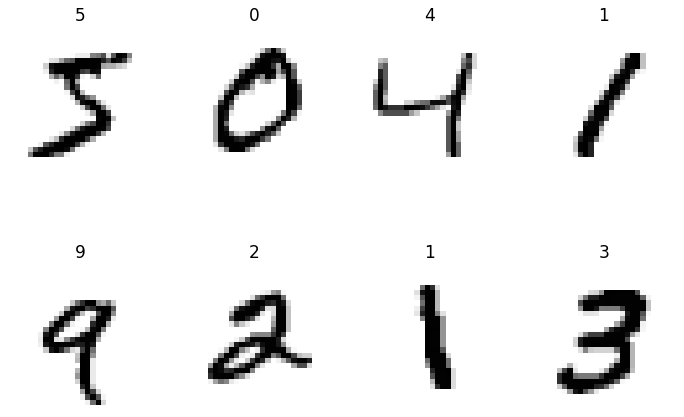

In [19]:
plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(240 + i + 1)
    plt.imshow(X_train[i], cmap='gray_r')
    plt.title(y_train[i], color='black', fontsize=17)
    plt.axis('off')

plt.show()

Standaryzacja 

In [20]:
X_test = X_test / 255
X_train = X_train / 255
print(X_train.shape)
print(f'\n{X_test.shape}')

(5000, 28, 28)

(10000, 28, 28)


Wypłaszczenie obrazów

In [21]:
X_train = X_train.reshape(-1, 28 * 28)
X_train.shape

(5000, 784)

PCA - 3 komponenty

In [22]:
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:5]

array([[ 0.4555,  1.4463, -0.1265],
       [ 4.0678,  1.5156,  2.1631],
       [-0.1116, -1.7779, -0.6184],
       [-3.4395,  2.3377,  0.6104],
       [-1.403 , -2.6952, -0.1719]])

Wyjaśniona wariancja

In [23]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.098676,0.098676,1
1,0.074045,0.172721,2
2,0.061277,0.233998,3


In [24]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))
fig.show()

In [25]:
X_train_pca_df = pd.DataFrame(np.c_[X_train_pca, y_train], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['class'] = X_train_pca_df['class'].astype('str')
X_train_pca_df.head()

,pca_1,pca_2,pca_3,class
0,0.455497,1.446273,-0.126459,5.0
1,4.067775,1.515641,2.163091,0.0
2,-0.111577,-1.777913,-0.618414,4.0
3,-3.439492,2.337747,0.610395,1.0
4,-1.403010,-2.695155,-0.171906,9.0


Wizualizacja 3D głównych komponentów

In [26]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='class', 
              symbol='class', opacity=0.7, size_max=10, width=950, height=700, 
              template='plotly_dark', title='PCA - MNIST dataset')

PCA za pomocą procentu całkowitej wariancji

In [27]:
pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[0]

array([ 0.4555,  1.4464, -0.1266, -2.0464, -0.9062,  0.8658,  0.7143,  0.3843,  1.2169, -0.5736,  0.2233, -1.8176, -1.0697,  2.8846,  0.0435,
        0.4055, -1.3517, -0.4881,  0.7439,  1.2559,  0.491 ,  0.8971,  0.7157,  0.7823, -0.2474, -0.3642,  1.3117,  0.4369,  0.4515, -0.1556,
       -0.5905,  0.0318, -0.0879, -0.1545, -0.1757, -0.4434,  0.7237, -0.3561,  0.4432,  1.7112,  0.2673, -0.8439, -0.3894, -0.1528, -0.044 ,
       -0.5125, -0.6194, -0.1968,  0.2109, -0.3994,  0.3107, -0.0907,  0.1361, -0.5926,  0.0147,  0.7161,  0.497 ,  0.6163, -0.2884, -0.1627,
        0.5686, -0.1277,  0.6545, -0.3407,  0.7817,  0.2586, -0.0567, -0.2488, -0.3312, -0.1065, -0.0352, -0.6306,  0.0124, -0.2624, -0.3622,
       -0.29  ,  0.0276,  0.2364,  0.1238, -0.0304, -0.0702, -0.2134, -0.0943,  0.0714, -0.4736, -0.3605, -0.2183,  0.1694, -0.233 , -0.1073,
        0.2171, -0.0678,  0.043 ,  0.2504, -0.0245, -0.1631,  0.0138,  0.2231,  0.3506,  0.0314, -0.5392, -0.0519, -0.2189,  0.1758, -0.036 ,
      

In [28]:
pca.n_components_

148

Wyjaśniona wariancja

In [29]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results.head()

,explained_variance_ratio,cumulative,component
0,0.098676,0.098676,1
1,0.074045,0.172721,2
2,0.061277,0.233998,3
3,0.054053,0.288051,4
4,0.047376,0.335427,5


In [30]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 95%', width=950, template='plotly_dark'))
fig.show()

### <a name='6'></a> Zbiór danych Cifar

In [31]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


Obcięcie do pierwszych 5000 obrazów

In [32]:
X_train = X_train[:5000]
y_train = y_train[:5000]
X_train[0].shape

(32, 32, 3)

In [33]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

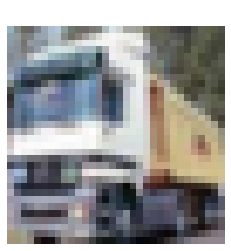

In [34]:
targets = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
           5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

plt.imshow(X_train[1])
plt.title(targets[y_train[1][0]], color='white', fontsize=17)
plt.axis('off')
plt.show()

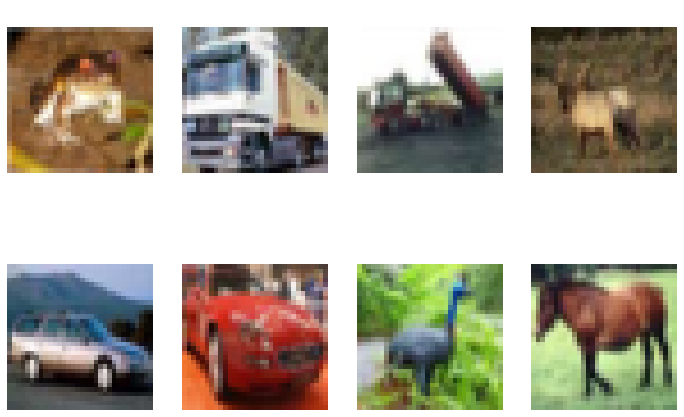

In [35]:
plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(240 + i + 1)
    plt.imshow(X_train[i])
    plt.title(targets[y_train[i][0]], color='white', fontsize=17)
    plt.axis('off')
plt.show()

Standaryzacja

In [36]:
X_train = X_train / 255.
X_test = X_test / 255.
X_train.shape

(5000, 32, 32, 3)

Wypłaszczenie obrazów

In [37]:
X_train = X_train.reshape(-1, 32 * 32 * 3)
X_train.shape

(5000, 3072)

In [38]:
X_train[:5]

array([[0.2314, 0.2431, 0.2471, ..., 0.4824, 0.3608, 0.2824],
       [0.6039, 0.6941, 0.7333, ..., 0.5608, 0.5216, 0.5647],
       [1.    , 1.    , 1.    , ..., 0.3137, 0.3373, 0.3294],
       [0.1098, 0.098 , 0.0392, ..., 0.2824, 0.2549, 0.1804],
       [0.6667, 0.7059, 0.7765, ..., 0.2863, 0.302 , 0.3137]])

In [39]:
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:5]

array([[ -6.5023,   2.5505,   1.5772],
       [  0.8709,  -0.8715,   6.2163],
       [  8.111 , -11.1948,  -2.6912],
       [-10.3522,  -0.2394,   1.2522],
       [ -2.4619,  -4.8347,   1.2479]])

Wyjaśniona wariancja

In [40]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.291944,0.291944,1
1,0.112451,0.404395,2
2,0.066359,0.470754,3


In [41]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))
fig.show()

In [42]:
X_train_pca_df = pd.DataFrame(np.c_[X_train_pca, y_train], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['name'] = X_train_pca_df['class'].map(targets)
X_train_pca_df['class'] = X_train_pca_df['class'].astype('str')
X_train_pca_df.head()

,pca_1,pca_2,pca_3,class,name
0,-6.502318,2.550480,1.577223,6.0,frog
1,0.870890,-0.871500,6.216315,9.0,truck
2,8.111013,-11.194790,-2.691170,9.0,truck
3,-10.352160,-0.239424,1.252193,4.0,deer
4,-2.461939,-4.834697,1.247868,1.0,automobile


In [46]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='name', 
              symbol='name', opacity=0.7, size_max=10, width=950, height=700, 
              template='plotly_dark', title='PCA - CIFAR dataset')

In [47]:
pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[0]

array([-6.5023,  2.5505,  1.5772,  2.8171, -4.689 ,  1.0893, -0.3166, -0.3928,  3.1677, -0.9979,  0.2916, -0.17  , -0.0868, -0.3047,  0.887 ,
       -0.7984,  0.4836, -0.0692,  0.5311,  0.7149, -0.4497, -1.3223, -0.2011, -1.589 , -0.1546,  0.6288,  1.0733,  0.1725,  1.5402, -0.6995,
       -0.3199, -0.9693,  0.0179,  0.4488, -0.2715,  1.4752, -0.4041,  0.7392, -0.1002,  0.0154,  0.8168,  0.6638, -0.7012, -0.3257,  0.2252,
        0.1063, -0.1499,  0.7627, -0.0492,  1.0742,  0.0448, -0.6756, -0.0336, -0.925 ,  0.5862,  0.0813, -0.2281,  0.0017,  0.3966,  0.3775,
        0.4023, -0.7372,  0.3825,  0.099 ,  0.2561,  0.4095, -0.6717, -0.7232,  0.5812,  0.5109, -0.356 ,  0.0116, -0.1865,  0.0445,  0.2776,
        0.3037, -0.159 , -0.0083, -0.1422,  0.6091, -0.1363, -0.3946, -0.007 ,  0.22  , -0.0755, -0.7125,  0.2949,  0.4077,  0.2385,  0.5077,
        0.3033, -0.5686, -0.1122,  0.3958,  0.624 ,  0.0486,  0.1492,  0.0084,  0.0453, -0.1337, -0.0264, -0.2775,  0.5284,  0.34  ,  0.0526,
      

In [49]:
pca.n_components_

203

In [50]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results.head()

,explained_variance_ratio,cumulative,component
0,0.291944,0.291944,1
1,0.112451,0.404395,2
2,0.066359,0.470754,3
3,0.037136,0.507891,4
4,0.035443,0.543334,5


In [51]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 95%', width=950, template='plotly_dark'))
fig.show()